In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

# 단일선형회귀

In [2]:
data = {'x':[13,19,16,14,15,14],'y':[40,83,62,48,58,43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [3]:
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['x']), y=data['y'])
print("a",linear_regression.intercept_)
print("b",linear_regression.coef_)

a -55.48175182481753
b [7.32846715]


In [4]:
prediction = linear_regression.predict(X=pd.DataFrame(data['x']))
prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

In [5]:
prediction = pd.DataFrame(prediction, columns=['predict'])
data1 = pd.concat([data, prediction], axis=1)

In [6]:
data1

,x,y,predict
0,13,40,39.788321
1,19,83,83.759124
2,16,62,61.773723
3,14,48,47.116788
4,15,58,54.445255
5,14,43,47.116788


# 다중선형회귀1

In [7]:
car_data = {'x1':[13,18,17,20,22,21],'x2':[9,7,17,11,8,10],'y':[20,22,30,27,35,32]}
car_data = pd.DataFrame(car_data)
car_data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [8]:
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(car_data[['x1','x2']]),y=car_data['y'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
a=linear_regression.intercept_
b=linear_regression.coef_

In [10]:
car_predict=linear_regression.predict(X=pd.DataFrame(car_data[['x1','x2']]))
car_predict

array([18.33980044, 24.81208426, 29.51496674, 30.39966741, 31.61419069,
       31.31929047])

In [11]:
residual=(car_data['y'])-(car_predict)
residual

0    1.660200
1   -2.812084
2    0.485033
3   -3.399667
4    3.385809
5    0.680710
Name: y, dtype: float64

In [12]:
SSE = (residual**2).sum()
SST = ((car_data['y']-car_data['y'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print(SSE)
print(SST)
print(R_squared)

34.38414634146338
169.33333333333331
0.7969440176685233


In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
print(linear_regression.score(X=pd.DataFrame(car_data[['x1','x2']]), y=car_data['y']))
print(mean_squared_error(car_predict, car_data['y']))
print(mean_squared_error(car_predict, car_data['y'])**0.5)

0.7969440176685233
5.730691056910563
2.393886182948254


# 다중선형회귀 실습2

In [15]:
from sklearn import datasets
boston_house_price = datasets.load_boston()
print(boston_house_price.keys())
print(boston_house_price.data.shape)
print(boston_house_price.feature_names)
print(boston_house_price.data)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [16]:
X=pd.DataFrame(boston_house_price.data, columns=boston_house_price.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
X['price'] = boston_house_price.target
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
y=X.pop('price')

In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [20]:
linear_regression.fit(X=pd.DataFrame(X),y=y)
boston_predict = linear_regression.predict(X = pd.DataFrame(X))
print('a : ', linear_regression.intercept_ )
print('b : ', linear_regression.coef_)

a :  36.459488385089855
b :  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [21]:
boston_residual = y-boston_predict
boston_residual.describe()

count    5.060000e+02
mean     2.924319e-15
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
Name: price, dtype: float64

In [22]:
boston_SSE = (boston_residual**2).sum()
boston_SST = ((y-y.mean())**2).sum()
boston_R_squared = 1-(boston_SSE/boston_SST)
print(boston_SSE, boston_SST, boston_R_squared)

11078.784577954977 42716.29541501976 0.7406426641094094


In [23]:
print(linear_regression.score(X=pd.DataFrame(X), y=y))
print(mean_squared_error(y, boston_predict))
print(mean_squared_error(y, boston_predict)**0.5)

0.7406426641094095
21.894831181729202
4.679191295697281


In [24]:
X.shape[0]

506

In [25]:
R = 1-(1-boston_R_squared)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
R

0.7337897263724629

# 미세먼지 데이터를 이용한 상관관계 분석

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dust_data=pd.read_csv("data/2015_data.csv", encoding='cp949')
dust_data.tail()

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
5456,충북,2015-12-27,0.006,0.547,0.018,0.018,43.454,26.738
5457,충북,2015-12-28,0.005,0.568,0.012,0.025,36.038,21.360
5458,충북,2015-12-29,0.006,0.845,0.007,0.032,56.063,33.824
5459,충북,2015-12-30,0.006,0.862,0.006,0.031,64.832,42.903
5460,충북,2015-12-31,0.006,0.895,0.009,0.030,64.295,53.211


In [28]:
dust_data_seoul = dust_data[dust_data.Location.isin(['서울'])]
dust_data_seoul

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
719,서울,2015-01-01,0.005,0.378,0.019,0.012,66.653,12.800
720,서울,2015-01-02,0.006,0.480,0.016,0.021,29.135,12.788
721,서울,2015-01-03,0.007,0.740,0.006,0.040,36.663,19.946
722,서울,2015-01-04,0.007,0.812,0.005,0.045,41.669,22.700
723,서울,2015-01-05,0.008,1.104,0.004,0.055,76.681,40.386
...,...,...,...,...,...,...,...,...
4818,서울,2015-12-27,0.005,0.433,0.019,0.019,29.940,16.030
4819,서울,2015-12-28,0.005,0.507,0.015,0.027,27.810,14.918
4820,서울,2015-12-29,0.007,0.984,0.004,0.052,57.145,31.710
4821,서울,2015-12-30,0.006,0.826,0.004,0.050,59.556,34.951


In [29]:
dust_data_seoul.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.643323,-0.185885,0.642349,0.377125,0.602491
CO,0.643323,1.000000,-0.597343,0.832596,0.380044,0.732430
O3,-0.185885,-0.597343,1.000000,-0.523796,-0.065889,-0.123384
NO2,0.642349,0.832596,-0.523796,1.000000,0.295676,0.601958
PM10,0.377125,0.380044,-0.065889,0.295676,1.000000,0.671326
PM25,0.602491,0.732430,-0.123384,0.601958,0.671326,1.000000


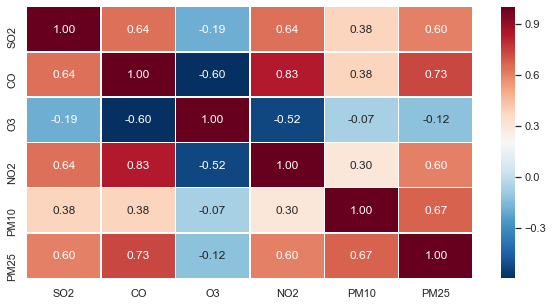

In [30]:
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1)
f,ax = plt.subplots(figsize=(10,5))
dust_data_seoul_heatmap = sns.heatmap(dust_data_seoul.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='RdBu_r' )

In [31]:
matplotlib.__version__

'3.1.2'